Data From:
"renz: An R package for the analysis of enzyme kinetic data." J.C. Aledo BMC Bioinformatics, 2022, 23, 182. https://doi.org/10.1186/s12859-022-04729-4

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress

def MM(S, KM, Vmax):
    return Vmax*(S/(S+KM))

#github_location = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/data/"
github_location = "./"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"



In [55]:
##############################################################
### Import the data and perform calculations
##############################################################

Data_File_Name = "data_bGalacosidase_AU.csv"
Filename = github_location + Data_File_Name

df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

 
###################################################
### Get the data
###################################################
e420_ONPG = 4500   # M^-1 cm^-1
pKa_ONP = 7.23
pH = 7.0
Temp = 25   # degree C

HH_ratio = 10**(pH - pKa_ONP)   # ratio of A/AH
mole_fraction_coloured = HH_ratio/(1+HH_ratio)




x = df["ONPG"]
y = df["v4"]

### Convert y from AU/min to uM/min

y = y / e420_ONPG * 1E6   ### divide by extinction coeff and convert to uM
y = y / mole_fraction_coloured   ### near pH 7 only a fraction is in anionic coloured form



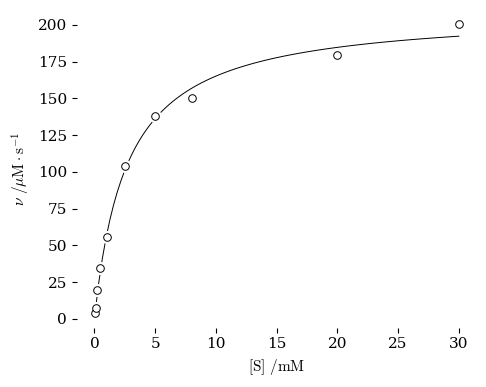

The KM value is 2.69 +/- 0.20
The Vmax value is 209.49 +/- 4.29


In [56]:
[KM, Vmax],pcov = curve_fit(MM,x,y, bounds = (0,np.inf))
perr = np.sqrt(np.diag(pcov))
[stDevKM,stDevVmax] = perr


###################################################
### Set up labels for plots
###################################################

x_label = "$\\rm [S]~/mM$"
y_label = "$\\rm \\nu~/\\mu M\\cdot s^{-1}$"

Title = "Michaelis-Menten"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size = [5,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  

ax.set(
#          title = Title,       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-5,105],                  
#          ylim=[-.5,.5]
       )

ax.scatter(x, y, 
             marker = "o", 
             s = 70, 
             color = "white", 
#             edgecolors = "black", 
#             linewidths=0.7, 
             zorder = 2)

ax.scatter(x, y, 
             marker = "o", 
             s = 30, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)

x_fit = np.linspace(np.min(x), np.max(x), 100)
y_fit = MM(x_fit,KM,Vmax)

ax.plot(x_fit, y_fit, 
#             marker = "o", 
#             s = 30, 
             color = "black", 
#             edgecolors = "black", 
             linewidth=0.7, 
             zorder = 1)

plt.savefig("MM.pdf")
plt.show()

print(f"The KM value is {KM:0.2f} +/- {stDevKM:0.2f}")
print(f"The Vmax value is {Vmax:0.2f} +/- {stDevVmax:0.2f}")


Second line using KM = 2.69 and Vmax = 209.49


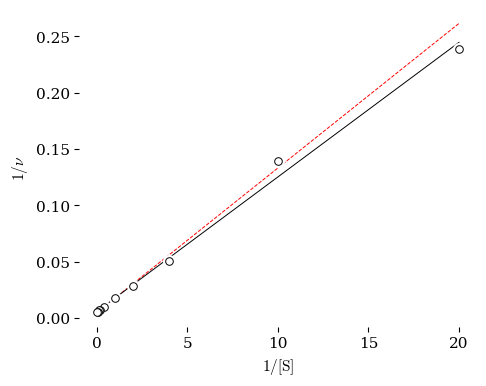

The KM value is 2.09 +/- 0.80
The Vmax value is 174.81 +/- 62.70
LinregressResult(slope=0.011938729782042273, intercept=0.00572044282331758, rvalue=0.9977411465673898, pvalue=1.1359326164146865e-10, stderr=0.000284190057457719, intercept_stderr=0.002051724750682658)


In [57]:
x_LB = 1/x
y_LB = 1/y

fitLB = linregress(x_LB, y_LB)

VmaxLB = 1 / fitLB.intercept
KMLB = fitLB.slope * VmaxLB

DevPercentKMLB = fitLB.stderr/fitLB.slope + fitLB.intercept_stderr/fitLB.intercept
DevPercentVmaxLB = fitLB.intercept_stderr/fitLB.intercept

stDevVmaxLB = VmaxLB * DevPercentVmaxLB
stDevKMLB = KMLB * DevPercentKMLB
### Uncertainties calculated according to https://www.geol.lsu.edu/jlorenzo/geophysics/uncertainties/Uncertaintiespart2.html#muldiv


###################################################
### Set up labels for plots
###################################################

# x_label = "$\\rm 1/([S]~/mM)$"
# y_label = "$\\rm 1/(\\nu~/\\mu M\\cdot s^{-1})$"
x_label = "$\\rm 1/[S]$"
y_label = "$\\rm 1/\\nu$"

Title = "Lineweaver-Burke"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size = [5,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  

ax.set(
#          title = Title,       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[0,0.5],                  
#          ylim=[0,.02]
       )

ax.scatter(x_LB, y_LB, 
             marker = "o", 
             s = 70, 
             color = "white", 
#             edgecolors = "black", 
#             linewidths=0.7, 
             zorder = 2)

ax.scatter(x_LB, y_LB, 
             marker = "o", 
             s = 30, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)

x_fitLB = np.linspace(np.min(x_LB), np.max(x_LB), 100)
y_fitLB = fitLB.intercept + fitLB.slope * x_fitLB

ax.plot(x_fitLB, y_fitLB, 
#             marker = "o", 
#             s = 30, 
             color = "black", 
#             edgecolors = "black", 
             linewidth=0.7, 
             zorder = 1)

print(f"Second line using KM = {KM:0.2f} and Vmax = {Vmax:0.2f}")
y_fit2 = x_fitLB*KM/Vmax + 1/Vmax

ax.plot((x_fitLB), (y_fit2), 
#             marker = "o", 
#             s = 30, 
             color = "red", 
#             edgecolors = "black", 
             linewidth=0.7, 
             linestyle="--",
             zorder = 0)

plt.savefig("LB.pdf")

plt.show()

print(f"The KM value is {KMLB:0.2f} +/- {stDevKMLB:0.2f}")
print(f"The Vmax value is {VmaxLB:0.2f} +/- {stDevVmaxLB:0.2f}")
print(fitLB)

Second line using KM = 2.69 and Vmax = 209.49


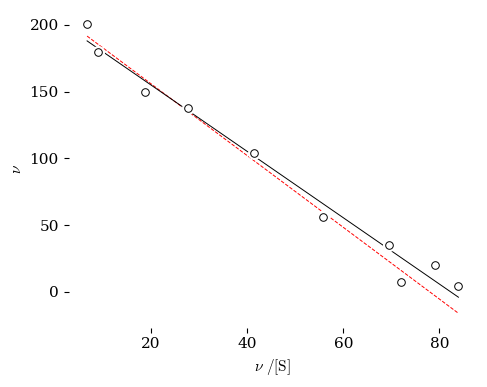

The KM value is 2.48 +/- 0.12
The Vmax value is 204.53 +/- 6.49
LinregressResult(slope=-2.4848439159057447, intercept=204.53344040404957, rvalue=-0.990851937137086, pvalue=3.030533317724136e-08, stderr=0.11965460263966171, intercept_stderr=6.48727450623703)


In [58]:
x_EH = y/x
y_EH = y

fitEH = linregress(x_EH, y_EH)

VmaxEH = fitEH.intercept
KMEH = -fitEH.slope

stDevKMEH = fitEH.stderr
stDevVmaxEH = fitEH.intercept_stderr



###################################################
### Set up labels for plots
###################################################

x_label = "$\\rm \\nu~/[S]$"
y_label = "$\\rm \\nu$"

Title = "Eadie-Hofstee"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size = [5,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  

ax.set(
#          title = Title,       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[0,60],                  
#          ylim=[0,150]
       )

ax.scatter(x_EH, y_EH, 
             marker = "o", 
             s = 70, 
             color = "white", 
#             edgecolors = "black", 
#             linewidths=0.7, 
             zorder = 2)

ax.scatter(x_EH, y_EH, 
             marker = "o", 
             s = 30, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)

x_fitEH = np.linspace(np.min(x_EH), np.max(x_EH), 100)
y_fitEH = fitEH.intercept + fitEH.slope * x_fitEH

ax.plot(x_fitEH, y_fitEH, 
#             marker = "o", 
#             s = 30, 
             color = "black", 
#             edgecolors = "black", 
             linewidth=0.7, 
             zorder = 1)

print(f"Second line using KM = {KM:0.2f} and Vmax = {Vmax:0.2f}")
y_fit2 = x_fitEH*(-KM) + Vmax

ax.plot((x_fitEH), (y_fit2), 
#             marker = "o", 
#             s = 30, 
             color = "red", 
#             edgecolors = "black", 
             linewidth=0.7, 
             linestyle="--",
             zorder = 0)

plt.savefig("EH.pdf")
plt.show()

print(f"The KM value is {KMEH:0.2f} +/- {stDevKMEH:0.2f}")
print(f"The Vmax value is {VmaxEH:0.2f} +/- {stDevVmaxEH:0.2f}")
print(fitEH)
#print(x_EH,y_EH)

Second line using KM = 2.69 and Vmax = 209.49


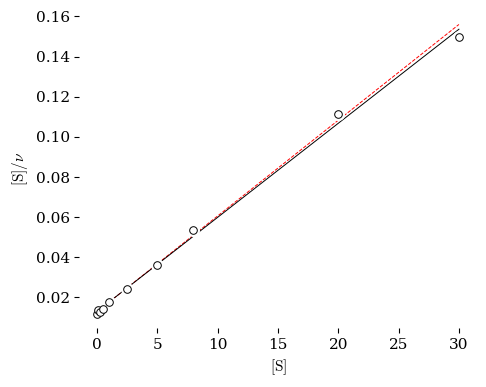

The KM value is 2.76711 +/- 0.26
The Vmax value is 213.24 +/- 16.08
LinregressResult(slope=0.00468946295622264, intercept=0.012976240145064329, rvalue=0.9987557778048776, pvalue=1.0469387050347597e-11, stderr=8.278423684567233e-05, intercept_stderr=0.0009783174078929271)


In [61]:
x_HW = x
y_HW = x/y

fitHW = linregress(x_HW, y_HW)

VmaxHW = 1/fitHW.slope
KMHW = fitHW.intercept * VmaxHW



DevPercentKMHW = fitHW.stderr/fitHW.slope + fitHW.intercept_stderr/fitHW.intercept
DevPercentVmaxHW = fitHW.intercept_stderr/fitHW.intercept

stDevVmaxHW = VmaxHW * DevPercentVmaxHW
stDevKMHW = KMHW * DevPercentKMHW
### Uncertainties calculated according to https://www.geol.lsu.edu/jlorenzo/geophysics/uncertainties/Uncertaintiespart2.html#muldiv








###################################################
### Set up labels for plots
###################################################

x_label = "$\\rm [S]$"
y_label = "$\\rm [S]/\\nu$"

Title = "Hanes-Woolf"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size = [5,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  

ax.set(
#          title = Title,       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[0,0.5],                  
#          ylim=[0,.22]
       )

ax.scatter(x_HW, y_HW, 
             marker = "o", 
             s = 70, 
             color = "white", 
#             edgecolors = "black", 
#             linewidths=0.7, 
             zorder = 2)

ax.scatter(x_HW, y_HW, 
             marker = "o", 
             s = 30, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)

x_fitHW = np.linspace(np.min(x_HW), np.max(x_HW), 100)
y_fitHW = fitHW.intercept + fitHW.slope * x_fitHW



ax.plot(x_fitHW, y_fitHW, 
#             marker = "o", 
#             s = 30, 
             color = "black", 
#             edgecolors = "black", 
             linewidth=0.7, 
             zorder = 1)

print(f"Second line using KM = {KM:0.2f} and Vmax = {Vmax:0.2f}")
y_fit2 = x_fitHW*(1/Vmax) + KM/Vmax

ax.plot((x_fitHW), (y_fit2), 
#             marker = "o", 
#             s = 30, 
             color = "red", 
#             edgecolors = "black", 
             linewidth=0.7, 
             linestyle="--",
             zorder = 0)

plt.savefig("HW.pdf")
plt.show()

print(f"The KM value is {KMHW:0.5f} +/- {stDevKMHW:0.2f}")
print(f"The Vmax value is {VmaxHW:0.2f} +/- {stDevVmaxHW:0.2f}")
print(fitHW)

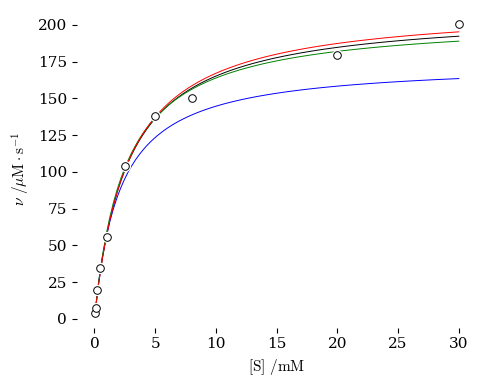

In [62]:
### Final Combined Plot

###################################################
### Set up labels for plots
###################################################

x_label = "$\\rm [S]~/mM$"
y_label = "$\\rm \\nu~/\\mu M\\cdot s^{-1}$"

Title = "Michaelis-Menten"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size = [5,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  

ax.set(
#          title = Title,       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-5,105],                  
#          ylim=[0,200]
       )

ax.scatter(x, y, 
             marker = "o", 
             s = 50, 
             color = "white", 
#             edgecolors = "black", 
#             linewidths=0.7, 
             zorder = 2)

ax.scatter(x, y, 
             marker = "o", 
             s = 30, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = MM(x_fit,KM,Vmax)

ax.plot(x2, y2, 
#             marker = "o", 
#             s = 30, 
             color = "black", 
#             edgecolors = "black", 
             linewidth=0.7, 
             zorder = 1)

y2 = MM(x_fit,KMLB,VmaxLB)

ax.plot(x2, y2, 
#             marker = "o", 
#             s = 30, 
             color = "blue", 
#             edgecolors = "black", 
             linewidth=0.7, 
             zorder = 1)


y2 = MM(x_fit,KMEH,VmaxEH)

ax.plot(x2, y2, 
#             marker = "o", 
#             s = 30, 
             color = "green", 
#             edgecolors = "black", 
             linewidth=0.7, 
             zorder = 1)


y2 = MM(x_fit,KMHW,VmaxHW)

ax.plot(x2, y2, 
#             marker = "o", 
#             s = 30, 
             color = "red", 
#             edgecolors = "black", 
             linewidth=0.7, 
             zorder = 1)



plt.savefig("MMandAll.pdf")

plt.show()